# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Rafael Almada </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
listinha=[]
for i in range(0,5):
    listinha.append(df.iloc[i])
print(listinha)

[Date                            01/02/1965
Time                              13:44:18
Latitude                            19.246
Longitude                          145.616
Type                            Earthquake
Depth                                131.6
Depth Error                            NaN
Depth Seismic Stations                 NaN
Magnitude                                6
Magnitude Type                          MW
Magnitude Error                        NaN
Magnitude Seismic Stations             NaN
Azimuthal Gap                          NaN
Horizontal Distance                    NaN
Horizontal Error                       NaN
Root Mean Square                       NaN
ID                            ISCGEM860706
Source                              ISCGEM
Location Source                     ISCGEM
Magnitude Source                    ISCGEM
Status                           Automatic
Name: 0, dtype: object, Date                            01/04/1965
Time                         

## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
hemi = []

for g in df.Latitude:
    if (g>0):
        hemi.append('Norte')
    else:
        hemi.append('Sul')
        
df['Hemisfério']=hemi
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

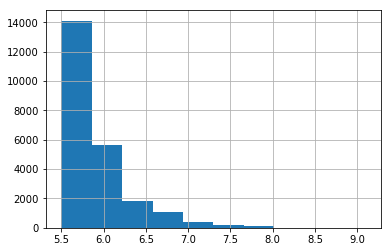

In [6]:
df['Magnitude'].hist()

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [7]:
x=expon.fit(df.Magnitude)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

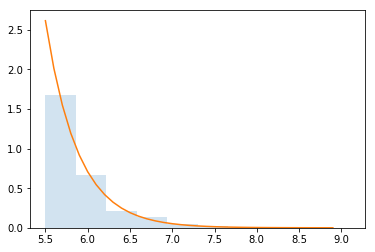

In [8]:
a=np.arange(5.5,9,0.1)
plt.hist(df.Magnitude, normed=1, alpha=0.2, histtype='stepfilled')
plt.plot(a,expon.pdf(a,loc=x[0],scale=x[1]))

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [9]:
N=pd.crosstab(df.Hemisfério,df.Type, margins=True, normalize=True, rownames=['Hemisfério'],colnames=['Type'])*100
print('Normalizado (em %): ')
N

Normalizado (em %): 


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,44.712113,0.008543,0.627883,0.000000,45.348539
Sul,54.519050,0.008543,0.119597,0.004271,54.651461
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [10]:
NotN=pd.crosstab(df.Hemisfério,df.Type, margins=True, rownames=['Hemisfério'],colnames=['Type'])*100
print('Dado a tabela não normalizada (de ocorrencia de eventos):')
NotN

Dado a tabela não normalizada (de ocorrencia de eventos):


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,1046800,200,14700,0,1061700
Sul,1276400,200,2800,100,1279500
All,2323200,400,17500,100,2341200


In [11]:
print('P(T/N) = 44.712113%')

P(T/N) = 44.712113%


Explique o seu raciocínio

## Raciocínio: 
Segundo a tabela de ocorrência de eventos, a probabilidade de um terremoto ocorrer no hemisfério norte é o número total de eventos de terremoto no hemisfério norte, dividido pelo número total de eventos nos dois hemisférios (o espaço amostral todo)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

### Por Bayes:

A probabilidade de ser Nuclear Explosion dados que ocorreu no Norte é igual a probabilidade de ocorrer no norte dado que é uma Nuclear Explosion multiplicado pela probabilidade de ser uma Nuclear Explosion, dividido pela probabilidade de ser no Norte.

In [12]:
Pn=(NotN['All']['Norte'])/(NotN['All']['All']) #Probabilidade de ser norte
Pne=(NotN['Nuclear Explosion']['All'])/(NotN['All']['All']) #Probabilidade de ser Nuclear Explosion
Pnne=(NotN['Nuclear Explosion']['Norte'])/(NotN['Nuclear Explosion']['All']) #Probabilidade de ser Norte dado que é uma Nuclear Explosion
Pnen=(Pnne*Pne)/Pn #Probabilidade de ser Nuclear Explosion dado que é Norte
print('Probabilidade de ser uma Nuclear Explosion dado que ocorreu no norte = '+str(Pnen*100)+'%')

Probabilidade de ser uma Nuclear Explosion dado que ocorreu no norte = 1.38457191297%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

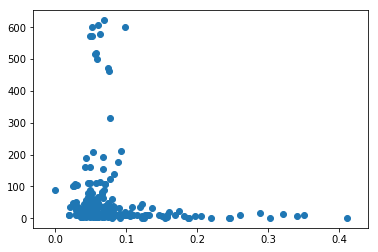

In [13]:
plt.scatter(df['Magnitude Error'],df['Depth'])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [14]:
Cov1=df['Magnitude Error'].corr(df['Depth'])
print('A Correlação entre "Magnitude Error" e "Depth" é de: '+str(Cov1))

A Correlação entre "Magnitude Error" e "Depth" é de: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

### Significado:
O valor da Correlação calculada entre 'Magnitude Error' e 'Depth', por ser muito próximo de zero, indica uma ausência de relação linear.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [15]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x297843ff1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x29784406ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2978440fdd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2978440f5c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x297843ffb38>,
  <matplotlib.lines.Line2D at 0x297843ffd30>]}

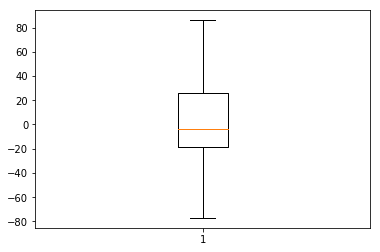

In [16]:
plt.boxplot(df.Latitude)

## Latitude:
Segundo o describe da latitude, a maior parte das latitudes presentes no Dataframe são no Hemisfério Norte, sendo a média ainda positiva, porém, apesar de não muito disperso, os dois primeiros quartis do boxplot são negativos, sendo os negativos ocorridos no hemisfério Sul. Contudo, conclui-se que a maior parte dos dados se encontram próximos à linha do equador.

In [17]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x297844a1a20>],
 'caps': [<matplotlib.lines.Line2D at 0x297844a8da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29784538cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29784531e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x297844a1be0>,
  <matplotlib.lines.Line2D at 0x297844a8be0>]}

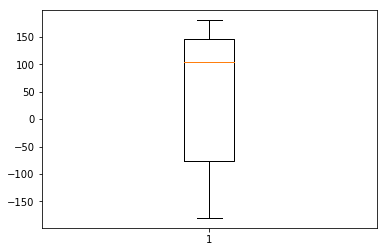

In [18]:
plt.boxplot(df.Longitude)

## Longitude:
Segundo o describe da longitude, pode se perceber que na média, a longitude é positiva, sendo assim ela se encontra à leste do meridiano de greenwich. Porém analisando o boxplot, pode se perceber que a dispersão da longitude é bem grande, maior do que a dispersão da latitude, sendo seu primeiro quartil negativo e os outros dois quartis positivos. Com isso conclui-se que a maior parte dos dados se dão a leste de greenwich.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [22]:
north=0
south=0
g=0
while g<len(df):
    if (df['Magnitude Type'][g]=='MB' and df['Type'][g]=='Nuclear Explosion'):
        if (df['Hemisfério'][g]=='Norte'):
            north+=1
            g+=1
        else:
            south+=1
            g+=1
    g+=1
print('Número de eventos de Magnitude Type = MB e Type = Nuclear Explosion que estão no Norte = '+str(north))
print('Número de eventos de Magnitude Type = MB e Type = Nuclear Explosion que estão no Sul = '+str(south))

Número de eventos de Magnitude Type = MB e Type = Nuclear Explosion que estão no Norte = 130
Número de eventos de Magnitude Type = MB e Type = Nuclear Explosion que estão no Sul = 28


In [25]:
Pnorth=north/len(df)
Psouth=south/len(df)
if (Pnorth>Psouth):
    print('É mais provável que esse lugar seja no Norte, sua probabilidade é de: '+str(Pnorth*100)+'%')
else:
    print('É mais provável que esse lugar seja no Sul, sua probabilidade é de: '+str(Psouth*100)+'%')

É mais provável que esse lugar seja no Norte, sua probabilidade é de: 0.5552708012984794%
